<a href="https://colab.research.google.com/github/jxlyn/CSCI-4962-Projects-ML-AI/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1 (10 points): Assuming you are not familiar with the framework, in this part of the
homework you will present your research describing the resources you used to learn the
framework (must include links to all resources). Clearly explain why you needed a particular
resource for implementing a 2-layer Neural Network (NN). (Consider how you will keep track of
all the computations in a NN i.e., what libraries/tools do you need within this framework.)**

I choose Tensorflow as my framework for this homework because of it has built-in layers, optimizers, and activation functions. It's very useful/convenient when generating an 2-layer Neural Network using these tools. I'm not familiar with Tensorflow, so I did some research on Tensorflow. I used the links given on the homework questions sheet https://www.tensorflow.org/guide/autodiff and https://www.tensorflow.org/api_docs/python/tf/GradientTape to learn more about how do we use the automatic differentiation in the TensorFlow and how the GradientTape works. Automatic differentiation is extremely useful for implementing backpropagation for training neural networks. In Tensorflow, it's using tf.Variable to records relevant operrations executed inside the tf.GradientTape API. The tf.GradientTape will compute the gradident of a computation. \
Besides the link that is given on the homework pdf, I also looked at https://www.tensorflow.org/guide/intro_to_modules#keras_models_and_layers . I learned that what type of layers are in Tensorflow, how each layers intereact with each other, and how do we build the MyDense layer flexiblely. Furthermore, I watched https://www.youtube.com/watch?v=_c_x8A3mNDk and https://www.youtube.com/watch?v=w8yWXqWQYmU  to get an idea how the code works for the Neural Network and reinforce my knowledge on Neural Network.
For the regularization that I want to use on my data, I looked at the source https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator , I learned how to use ImageDataGenerator to increase the number of unique input samples, thus make the result more accurate.

**Task 2 (60 points): Once you have figured the resources you need for the project, design, and implement your project. The project must include the following steps (it’s not limited to these steps):**  \
 **1. Exploratory Data Analysis (Can include data cleaning, visualization etc.)**\
**2. Perform a train-dev-test split.**\
**3. Implement forward propagation (clearly describe the activation functions and other hyper-parameters you are using).**\
**4. Compute the final cost function.**\
**5. Implement gradient descent (any variant of gradient descent depending upon your data and project can be used) to train your model. In this step it is up to you as someone in charge of their project to improvise using optimization algorithms (Adams, RMSProp etc.) and/or regularization.** \
**6. Present the results using the test set. NOTE: In this step, once you have implemented your 2-layer network you may increase and/or decrease the number of layers as part of the hyperparameter tuning process.** 


A machine learning problem that I would like to solve using Neutral Network is to predict whether or not a handwritten Chinese number is 9. The cultural diversity have been a hot topic in U.S. recent years. The Chinese culture is a big part of the cultural diversity in U.S. The Chinese food become more popular over the years. The price of the many food are ending with 0.99. Thus, I choose to implement a machine learning model to predict whether or or not a handwritten Chinese number is 9. This will help people to know more about Chinese culture/language.


In [85]:
import pandas as pd
import tensorflow as tf
from pandas import Series, DataFrame
from google.colab import drive
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings
warnings.filterwarnings("ignore")

drive.mount('/content/drive')

data = pd.read_csv('drive/My Drive/ML and AI/Hw3/chinese_data.csv')
data2 = data.copy()
data3 = data.copy()
data.head()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九


This shows the pixels of first 5 handwritten number in Chinese from the dataset.

In [6]:
data.isna()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label,character
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We can see that our data set doesn't have any missing values which is great for our analysis process.



In [7]:
data.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label
count,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004000,0.001533,0.000933,0.002133,0.001067,0.000200,0.001200,0.001400,0.001333,6.667410e+06
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164881,0.079570,0.085633,0.119428,0.073024,0.018257,0.079156,0.089807,0.095911,2.494502e+07
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.000000,5.000000,10.000000,10.000000,7.000000,2.000000,8.000000,9.000000,8.000000,1.000000e+08


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 4098 entries, pixel_0 to character
dtypes: int64(4097), object(1)
memory usage: 469.0+ MB


In [9]:
data.nunique()


pixel_0        1
pixel_1        1
pixel_2        1
pixel_3        1
pixel_4        1
              ..
pixel_4093     6
pixel_4094     6
pixel_4095     4
label         15
character     15
Length: 4098, dtype: int64

In [27]:
data_label = data["label"]

data_images = data.drop(["character", "label"], axis=1)

#represents the size of each image
data_images.shape

(15000, 4096)

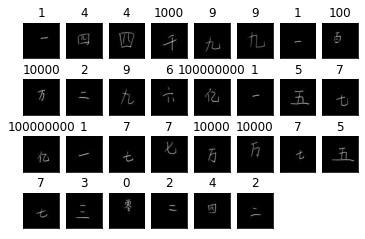

In [18]:
# display the first 20 images in the data set
indexes = np.random.randint(0, 15000, 30)
imgs = data.iloc[indexes,:]
labels = imgs["label"].to_numpy()
pixels = imgs.drop(columns=["label","character"]).to_numpy()

for i in range(30):
  plt.subplot((30//8)+1, 8, i+1)
  plot = pixels[i].reshape((64,64))
  plt.imshow(plot, cmap="gray")
  plt.xticks([])
  plt.yticks([])
  plt.title(labels[i])

plt.show()


This shows the random 30 images in the dataset.

In [24]:
fig = px.histogram(data, x="character", color="label")
fig.update_layout(bargap=0.2)
iplot(fig)

In [55]:
# normalize the data
# change the label
# if the label is is 9, mark it to 1
# if the label is other than 9, mark it to 0
ds_label = data2["label"]
ds_images = data2.drop(["label", "character"], axis=1)
ds_images_norm = ds_images/255.0
ds_images_norm = ds_images_norm.values.reshape(-1, 64, 64, 1)
ds_label.replace(1, 0, inplace=True)
ds_label.replace(2, 0, inplace=True)
ds_label.replace(3, 0, inplace=True)
ds_label.replace(4, 0, inplace=True)
ds_label.replace(5, 0, inplace=True)
ds_label.replace(6, 0, inplace=True)
ds_label.replace(7, 0, inplace=True)
ds_label.replace(8, 0, inplace=True)
ds_label.replace(9, 1, inplace=True)
ds_label.replace(10, 0, inplace=True)
ds_label.replace(100, 0, inplace=True)
ds_label.replace(1000, 0, inplace=True)
ds_label.replace(10000, 0, inplace=True)
ds_label.replace(100000000, 0, inplace=True)
df_label_onehot = to_categorical(ds_label, num_classes = 15)

#Perform a train-dev-test split.
x_train, x_test, y_train, y_test = train_test_split(ds_images_norm, ds_label, test_size=0.1, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.15, random_state = 42)
tf.random.set_seed(42)

# Implement forward propagation
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 1)), #input layer
    tf.keras.layers.Dense(128, activation="relu"), # 1st hidden layer with relu activation
    tf.keras.layers.Dense(128, activation="relu"), # 2nd hidden layer with relu activation
    tf.keras.layers.Dense(15, activation="softmax") #15 neruons on the output layer with softmax activation
])

data_aug = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) 

train_generator = data_aug.flow(x_train, y_train, batch_size=64)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model_fit = model.fit(x_train, y_train, epochs=15,
                    validation_data=(x_val, y_val),batch_size=64)



Epoch 1/15
211/211 [==============================] - 2s 10ms/step - loss: 0.3693 - accuracy: 0.9270 - val_loss: 0.1900 - val_accuracy: 0.9482
Epoch 2/15
211/211 [==============================] - 2s 9ms/step - loss: 0.1742 - accuracy: 0.9430 - val_loss: 0.1472 - val_accuracy: 0.9522
Epoch 3/15
211/211 [==============================] - 2s 8ms/step - loss: 0.1292 - accuracy: 0.9576 - val_loss: 0.1305 - val_accuracy: 0.9592
Epoch 4/15
211/211 [==============================] - 2s 9ms/step - loss: 0.0866 - accuracy: 0.9701 - val_loss: 0.1226 - val_accuracy: 0.9600
Epoch 5/15
211/211 [==============================] - 2s 8ms/step - loss: 0.0569 - accuracy: 0.9811 - val_loss: 0.1139 - val_accuracy: 0.9624
Epoch 6/15
211/211 [==============================] - 2s 8ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.1243 - val_accuracy: 0.9616
Epoch 7/15
211/211 [==============================] - 2s 8ms/step - loss: 0.0257 - accuracy: 0.9929 - val_loss: 0.1378 - val_accuracy: 0.9537
Epoch

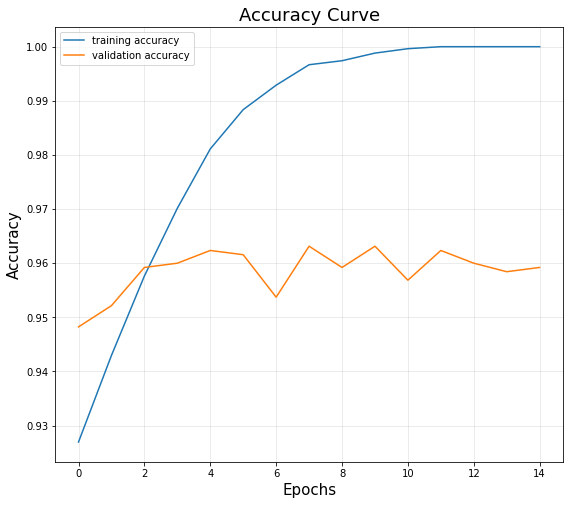

In [86]:
#create the accuracy curve graph
graph = plt.figure(figsize=(20,8))
graph.add_subplot(121)

plt.plot(model_fit.epoch,model_fit.history['accuracy'],label = "training accuracy") # Accuracy curve for training set
plt.plot(model_fit.epoch,model_fit.history['val_accuracy'],label = "validation accuracy")

plt.title("Accuracy Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

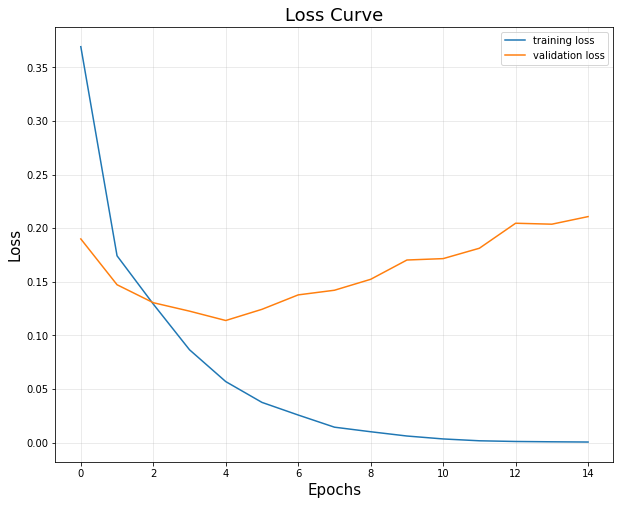

In [87]:
#create the loss graph
graph2 = plt.figure(figsize=(10,8))
graph.add_subplot(121)

plt.plot(model_fit.epoch,model_fit.history['loss'],label="training loss") # Loss curve for training set
plt.plot(model_fit.epoch,model_fit.history['val_loss'],label="validation loss")

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [89]:
loss,acc = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: {:.3f} \n".format(acc))
print("Loss:" ,"{:.3f}".format(loss))

8/8 [==============================] - 0s 3ms/step - loss: 0.3085 - accuracy: 0.9689
Accuracy: 0.969 

Loss: 0.308


**Task 3 (10 points): In task 2 describe how you selected the hyperparameters. What was the
rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use
an optimization algorithm? Why or why not?**

For input layer shape I used the number of features because it can increase the accuracy of the result. I have 2 hidden layers with relu activation. I choose relu activation as my hidden activation because the variables can interact with each other in this activation. For the output layer, I choose softmax activation with 15 neurons because there are 15 type of numbers in my dataset, the softmax activation can normalize the output of a network to a probability distribution over predicted output. For the loss function, I used cross entropy because it can measure the performance of a classification model whose output is a probability value between 0 and 1. I used mini-batch to train my model because it has stable convergence. \
I used data augmentation as my regularization method because it can reduce the cost of collecting, labelling data, and overfitting. Also, it can increase the accuracy of the data by transforming the images and creating more unique samples.\
I used Adam as my optimizer because it's more efficient than other optimizer in my data. It's like the combination of momentum and RMSP method. It uses the squared gradients to scale the learning rate and uses moving average of the gradient. Thus, It's good with sparse data, most consistent convergence, and it has faster computation time. 


**Task 4 (20 points): Create another baseline model (can be any model we covered so far except a
deep learning model). Using the same training data (as above) train your model and evaluate
results using the test set. Compare the results of both models (the Neural Network and the
baseline model). What are the reasons for one model performing better (or not) than the
other? Explain.**

In [79]:
#implementing decision tree
X = data3.drop(["label","character"], axis=1)
X = X.to_numpy()

Y = data3.drop(["character"], axis=1)
Y = Y.pop("label").values

#check if the number is 9, mark it
for z in range(len(Y)):
  if Y[z] == 9:
    Y[z] =1
  else:
    Y[z] =0

train_X , test_X, train_Y, test_Y = train_test_split(X,Y,train_size =0.9,test_size=0.1,random_state =42)
tree_model = DecisionTreeClassifier(max_depth=100, min_samples_split = 2, max_features =3).fit(train_X,train_Y)
pred_y1 = tree_model.predict(test_X)
print(f"Confusion matrix for decision tree model: \n{confusion_matrix(test_Y, pred_y1)}")
print(f"Accuracy score for decision tree model: {accuracy_score(pred_y1, test_Y)}")
print(f"F1 score for decision tree model: {f1_score( test_Y,pred_y1,average='weighted')}")


Confusion matrix for decision tree model: 
[[1317   90]
 [  75   18]]
Accuracy score for decision tree model: 0.89
F1 score for decision tree model: 0.8938097294876102


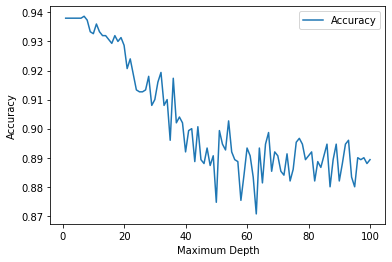

In [80]:
acc_scores = [] # Log testing errors for each model
max_depth_list = []
for i in range(1,101):
  max_depth_list.append(i)

for x in max_depth_list:
  tree_model2 = DecisionTreeClassifier(max_depth=x, min_samples_split = 2, max_features =3).fit(train_X,train_Y)
  pred_y2 = tree_model2.predict(test_X)
  acc_scores.append(accuracy_score(pred_y2, test_Y))

x = np.arange(100) + 1 
plt.plot(x, acc_scores, label='Accuracy') 
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

As we can see, the accuracy of the decision tree is lower than the accuracy of the 2-layer neural network. With the low maximum depth, the decision tree tend to have higher accuracy. As the maximum depth increase, the accuracy decreases. This is opposite of what we see in homework 2, this may due to the data type. Each pixel is treating as a feature in decision tree, the decision tree would choose the best feature to classify the image, so that the overall entropy reduces. With less entropy, the accuracy will decrease. \
On the other hand, 2-layer neural network's accuracy increase with epochs. The architecture of the neural network fits better with our problem statement because with the layers in the model, the model can use neurons to interact with each other. When solving the image classification problem, it can recognize the pattern better than the decision tree since it transforms the input and indirectly direct the activations of following neurons, but decision trees explicitly fit parameters to direct the information flow. 